## Import libraries

In [1]:
!pip install split-folders 

You should consider upgrading via the 'c:\users\asus\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import splitfolders as spfd
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D,Input,Dense,Conv2D,Add,SeparableConv2D,ReLU,BatchNormalization,MaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from prettytable import PrettyTable

from tqdm import tqdm

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Google Colab
Jalankan cell ini jika menggunakan google colab

## Dataset

In [3]:
#dataset = 'D:/Latihan/Dataset'
dataset = "D:\Bangkit 2022\SKUT\Dataset_2\Dataset - Copy"

## Exploratory Data Analysis & Data preparation

Menunjukkan Jumlah Image tiap Kelas

In [4]:
list = []
totalFiles = 0
totalDir = 0
for base, dirs, files in os.walk(dataset):
    list.append(len(files))
    #print('Searching in : {} with total {} image'.format(base,len(files)))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1

In [5]:
d = {'Class': os.listdir(dataset), 'Total_image_in_class': np.delete(list, [0])}
data1 = pd.DataFrame(data=d)
data1

,Class,Total_image_in_class
0,Acne,250
1,Cancer,250
2,Eksim,250
3,Normal,250
4,Rosacea,250


Menunjukkan persebaran data tiap kelas melalui bar plot

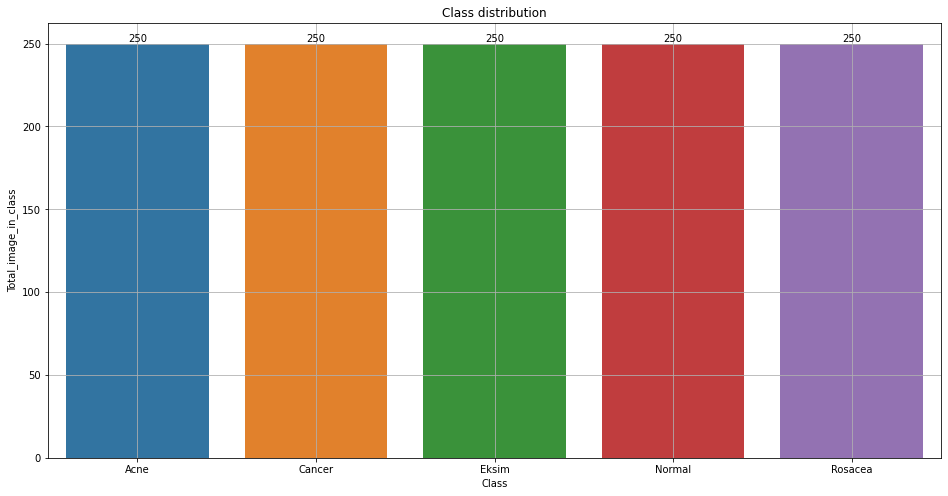

In [6]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data1,x='Class', y='Total_image_in_class')
plt.title('Class distribution')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [7]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data1)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data1['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 5
Jumlah total gambar dalam dataset adalah 1250


Melakukan EDA lebih dalam lagi

In [8]:
filenames = []
folder = []
image = []
shape = []
x = []
y = []

for path, subdirs, files in tqdm(os.walk(dataset)):
    for name in files:
        filenames += [os.path.join(path, name)]
        folder += [os.path.basename(os.path.dirname(filenames[-1]))]
        image += [os.path.basename(filenames[-1])]
        
for i in range (len(filenames)) :
    shape += [cv2.imread(filenames[i]).shape[0:2]]

for i in range (len(filenames)) :
    x += [shape[i][0]]
    y += [shape[i][1]]

new_ip = []
for i in range(len(filenames)) :
    new = filenames[i].replace("\\", "/")
    new_ip.append(new)
    
data2 = pd.DataFrame({'Image path':new_ip, 'Class':folder, 'Name_Image':image})

6it [00:00, 336.81it/s]


In [9]:
extension = []
for i in range (sum(data1['Total_image_in_class'])) :
    strValue = data2['Name_Image'][i]
    ch = '.'
    newCh = strValue[strValue.find(ch):]
    extension.append(newCh)

In [10]:
data2['Class_num'] = pd.factorize(data2['Class'])[0]
data2['Extension'] = extension
data2['Shape(x,y)'] = shape
data2['x'] = x
data2['y'] = y
data2

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
0,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Acne,008907VB.jpg,0,.jpg,"(430, 260)",430,260
1,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Acne,008911VB.jpg,0,.jpg,"(430, 260)",430,260
2,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Acne,008938HB.jpg,0,.jpg,"(1181, 1640)",1181,1640
3,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Acne,032200VB.jpg,0,.jpg,"(448, 260)",448,260
4,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Acne,032206VB.jpg,0,.jpg,"(448, 260)",448,260
...,...,...,...,...,...,...,...,...
1245,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Rosacea,rosacea-nose-5.jpg,4,.jpg,"(480, 720)",480,720
1246,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Rosacea,rosacea-nose-6.jpg,4,.jpg,"(480, 720)",480,720
1247,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Rosacea,rosacea-nose-7.jpg,4,.jpg,"(480, 720)",480,720
1248,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Rosacea,rosacea-nose-8.jpg,4,.jpg,"(480, 720)",480,720


Dataframe diatas akan kita lakukan sort terhadap kolom x dan y

In [11]:
data2.sort_values(by=['x','y'])

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
946,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Normal,0197.jpg,3,.jpg,"(129, 114)",129,114
843,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Normal,0094.jpg,3,.jpg,"(136, 116)",136,116
910,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Normal,0161.jpg,3,.jpg,"(143, 185)",143,185
823,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Normal,0074.jpg,3,.jpg,"(144, 131)",144,131
985,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Normal,0236.jpg,3,.jpg,"(146, 139)",146,139
...,...,...,...,...,...,...,...,...
1059,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Rosacea,r51.jpg,4,.jpg,"(2379, 2751)",2379,2751
639,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Eksim,d56.jpg,2,.jpg,"(2448, 3024)",2448,3024
947,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Normal,0198.jpg,3,.jpg,"(2600, 2570)",2600,2570
628,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Eksim,d44.jpg,2,.jpg,"(3088, 2320)",3088,2320


In [12]:
print("Ukuran gambar dalam dataset memiliki nilai minimum untuk (x,y) yaitu x={} dan y{}".format(min(x),min(y)))

Ukuran gambar dalam dataset memiliki nilai minimum untuk (x,y) yaitu x=129 dan y112


Kita buang gambar dalam dataset yang ukurannya kurang dari (180,180)

In [13]:
df_filtered = data2[(data2['x'] >= 180) & (data2['y'] >= 180)]
df_filtered

,Image path,Class,Name_Image,Class_num,Extension,"Shape(x,y)",x,y
0,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Acne,008907VB.jpg,0,.jpg,"(430, 260)",430,260
1,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Acne,008911VB.jpg,0,.jpg,"(430, 260)",430,260
2,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Acne,008938HB.jpg,0,.jpg,"(1181, 1640)",1181,1640
3,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Acne,032200VB.jpg,0,.jpg,"(448, 260)",448,260
4,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Acne,032206VB.jpg,0,.jpg,"(448, 260)",448,260
...,...,...,...,...,...,...,...,...
1245,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Rosacea,rosacea-nose-5.jpg,4,.jpg,"(480, 720)",480,720
1246,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Rosacea,rosacea-nose-6.jpg,4,.jpg,"(480, 720)",480,720
1247,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Rosacea,rosacea-nose-7.jpg,4,.jpg,"(480, 720)",480,720
1248,D:/Bangkit 2022/SKUT/Dataset_2/Dataset - Copy/...,Rosacea,rosacea-nose-8.jpg,4,.jpg,"(480, 720)",480,720


Melihat kembali persebaran dataset kita

In [14]:
data3 = df_filtered.groupby('Class').count().rename({'Class_num': 'Total_image_in_class'}, axis='columns')
data3['Total_image_in_class']

Class
Acne       250
Cancer     250
Eksim      250
Normal     165
Rosacea    250
Name: Total_image_in_class, dtype: int64

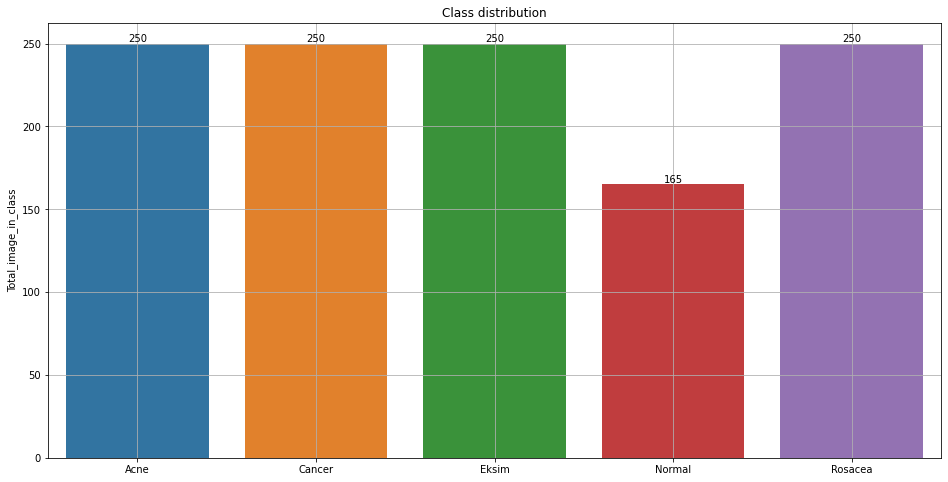

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=data3,x=data3.index.get_level_values(0).tolist(), y='Total_image_in_class')
plt.title('Class distribution')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [16]:
print("Jumlah kelas dalam dataset adalah {}".format(len(data3)))
print("Jumlah total gambar dalam dataset adalah {}".format(sum(data3['Total_image_in_class'])))

Jumlah kelas dalam dataset adalah 5
Jumlah total gambar dalam dataset adalah 1165


Persebaran data dari tiap kelas kurang merata

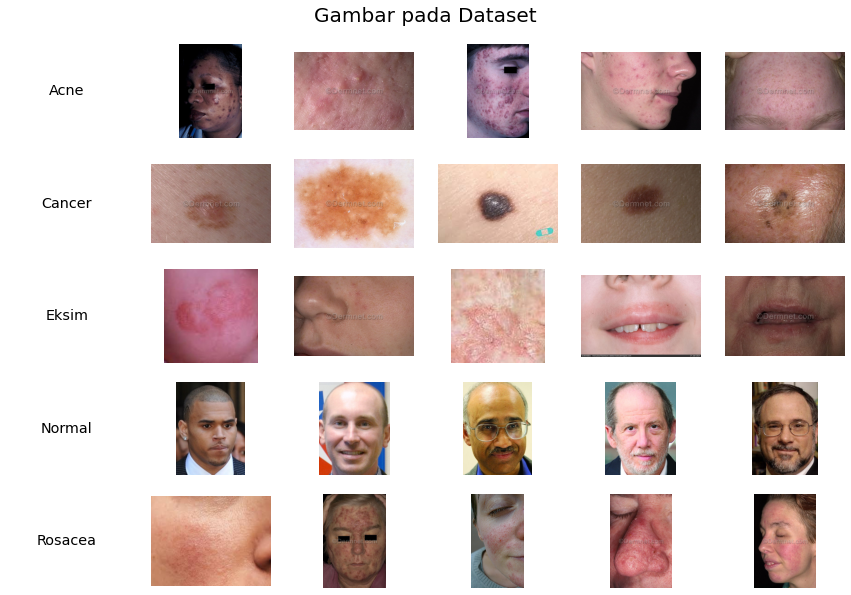

In [17]:
unique_list = []
unique = df_filtered.groupby('Class').apply(lambda df: df.sample(5))['Class'].unique()
fig = plt.figure(figsize=(15, 10))
plt.title('Gambar pada Dataset', fontsize=20, y=1.03)
plt.axis('off')
columns = 6
rows = 5
img2show = df_filtered.groupby('Class').apply(lambda df: df.sample(6))
for i in range(1, columns*rows +1):
    if i % columns == 1 :
        unique_list.append(i)
        fig.add_subplot(rows, columns, i)
        plt.text(0.5,0.5, unique[len(unique_list)-1], ha='center', va='center', fontsize='x-large', fontweight='normal')
        plt.axis('off')
    else :
        fig.add_subplot(rows, columns, i)
        img = mpimg.imread(img2show.iloc[i-1]['Image path'])
        #kelas = img2show.iloc[i-1]['Class']
        imgplot = plt.imshow(img)
        plt.axis('off')
        #plt.title(f'{kelas}')
plt.show()

## Data Splitting

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_filtered,
                                                    df_filtered['Class'], 
                                                    test_size=0.1, random_state=2022, stratify = df_filtered['Class'])

## Modelling

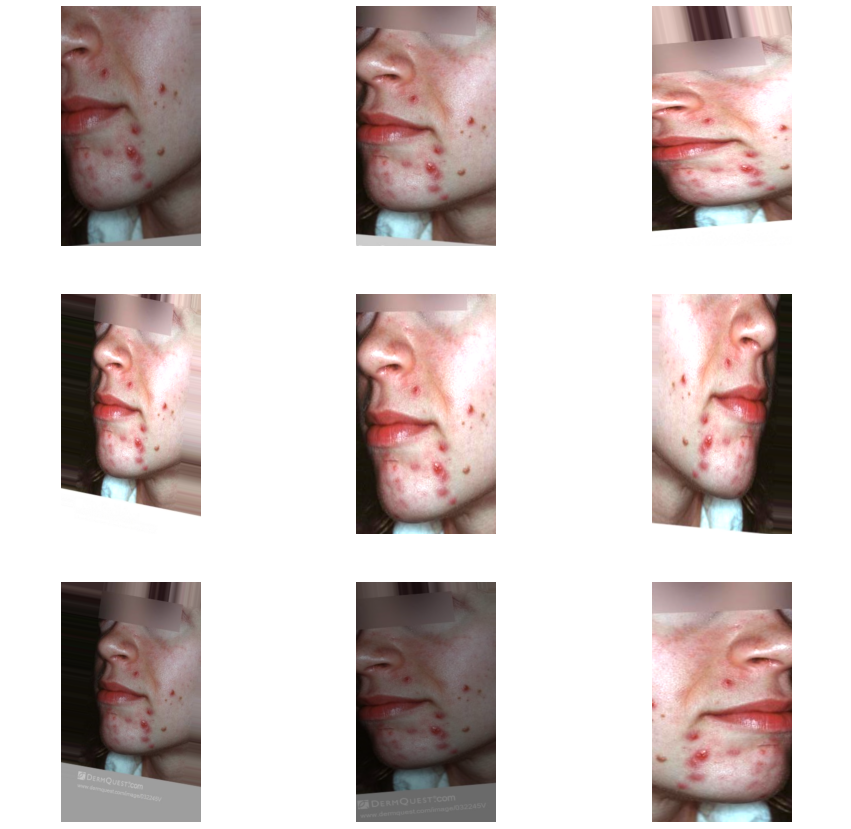

In [19]:
# Example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

# load the image
img = load_img("D:\Bangkit 2022\SKUT\Dataset_2\Dataset - Copy/Acne/032245VB.jpg")
# Convert to numpy array
data = img_to_array(img)
# Expand dimension to one sample
samples = expand_dims(data, 0)
# Create image data augmentation generator
datagen = ImageDataGenerator(            rotation_range=10,
                                         zoom_range=0.4,
                                         horizontal_flip=True,
                                         brightness_range=[0.5,1.4],
                                         width_shift_range=0.1, 
                                         height_shift_range=0.1,
                                         fill_mode='nearest'
                             )
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot


fig = plt.figure(figsize=(15, 15))
plt.axis('off')
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    batch = it.next()

    image = batch[0].astype('uint8')

    fig.add_subplot(rows, columns, i)
    imgplot = plt.imshow(image)
    
    plt.axis('off')
plt.show()

In [20]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   rescale=1/255,
                                   brightness_range=[0.4,1.5],
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   fill_mode='nearest') 
    
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [21]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge
from tensorflow.keras.applications.efficientnet import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7

list_model = [EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, 
              EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7,
              InceptionV3, MobileNet, MobileNetV2, NASNetMobile, NASNetLarge, 
              ResNet50, ResNet50V2, VGG16, VGG19
             ]

def load_pretrained_model(model_name, input_shape, include_top, weights, pooling) :
    pretrained_model = model_name(include_top = include_top,
                                  input_shape = input_shape, 
                                  weights =  weights,
                                  pooling = pooling
                                 )
    print("Using {} pretrained_model with input_shape = {}".format(model_name, input_shape))
    return pretrained_model

In [31]:
##################################################
# Define input to load_pretrained_model function #
##################################################

n = 10 #Masukkan angka dari 0-16
model_name = list_model[n] #Tidak perlu diubah-ubah
input_shape = (180,180, 3)
include_top = False
weights = 'imagenet'
pooling = 'avg'

##################################################

pretrained_model= load_pretrained_model(model_name, input_shape, include_top, weights, pooling)
#pretrained_model.trainable = False
for layer in pretrained_model.layers:
        layer.trainable=False

Using <function MobileNetV2 at 0x00000187F4951D38> pretrained_model with input_shape = (180, 180, 3)


In [32]:
pretrained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

In [33]:
def getModel():
    model = Sequential()
    model.add(pretrained_model),

    model.add(Flatten()),
    model.add(BatchNormalization()),
    model.add(Dropout(0.1)),
    model.add(Dense(64, activation='relu')),
    model.add(Dense(5, activation='softmax'))
    
    return model

In [34]:
getModel().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                81984     
                                                                 
 dense_3 (Dense)             (None, 5)                

In [35]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def scheduler(epoch, lr):
    if epoch <= 60:
        return lr 
    else:
        return lr * tf.math.exp(-0.1)

In [36]:
def plot_result(history, epoch, title):
    plt.style.use('ggplot')

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    f1 = history.history['f1']
    val_f1 = history.history['val_f1']

    learning_rate = history.history['lr']

    epochs_range = range(epoch)

    fig = plt.figure(figsize=(18, 8))
    st = fig.suptitle(title, fontsize=20, y=0.6)
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.subplot(2, 2, 3)
    plt.plot(epochs_range, f1, label='Training F1')
    plt.plot(epochs_range, val_f1, label='Validation F1')
    plt.legend(loc='lower right')
    plt.title('Training and Validation F1')

    plt.subplot(2, 2, 4)
    plt.plot(epochs_range, learning_rate)
    plt.title('Learning Rate')

    st.set_y(0.95)
    plt.show()

In [37]:
from sklearn.model_selection import StratifiedKFold
# ===============Stratified K-Fold======================
num_fold = 5
skf = StratifiedKFold(n_splits=num_fold, shuffle=True, random_state=2022)
skf.get_n_splits(X_train, y_train)

5

In [38]:
# Membuat list untuk menampung semua metrics
accuracy = []
val_accuracy = []

loss = []
val_loss = []

f_1 = []
val_f1 = []

Fold 1/5

Found 838 validated image filenames belonging to 5 classes.
Found 210 validated image filenames belonging to 5 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
27/27 [==============================] - 14s 407ms/step - loss: 1.1104 - accuracy: 0.5919 - f1: 0.5440 - val_loss: 0.8475 - val_accuracy: 0.6429 - val_f1: 0.6245 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
27/27 [==============================] - 9s 332ms/step - loss: 0.6627 - accuracy: 0.7232 - f1: 0.7083 - val_loss: 0.6281 - val_accuracy: 0.7524 - val_f1: 0.7295 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
27/27 [==============================] - 9s 335ms/step - loss: 0.5605 - accuracy: 0.7852 - f1: 0.7770 - val_loss: 0.5253 - val_accuracy: 0.7905 - val_f1: 0.8009 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.001000000047

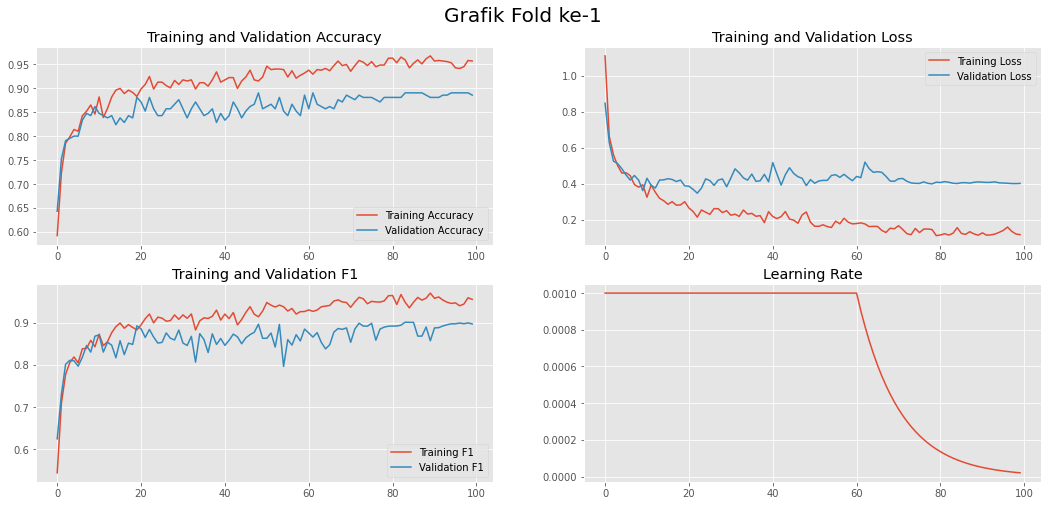


Fold 2/5

Found 838 validated image filenames belonging to 5 classes.
Found 210 validated image filenames belonging to 5 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
27/27 [==============================] - 13s 335ms/step - loss: 1.0614 - accuracy: 0.5931 - f1: 0.5657 - val_loss: 0.9117 - val_accuracy: 0.6333 - val_f1: 0.5978 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
27/27 [==============================] - 8s 310ms/step - loss: 0.6231 - accuracy: 0.7780 - f1: 0.7734 - val_loss: 0.7679 - val_accuracy: 0.6571 - val_f1: 0.6024 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
27/27 [==============================] - 9s 323ms/step - loss: 0.5620 - accuracy: 0.7745 - f1: 0.7621 - val_loss: 0.6706 - val_accuracy: 0.6952 - val_f1: 0.6831 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.00100000004

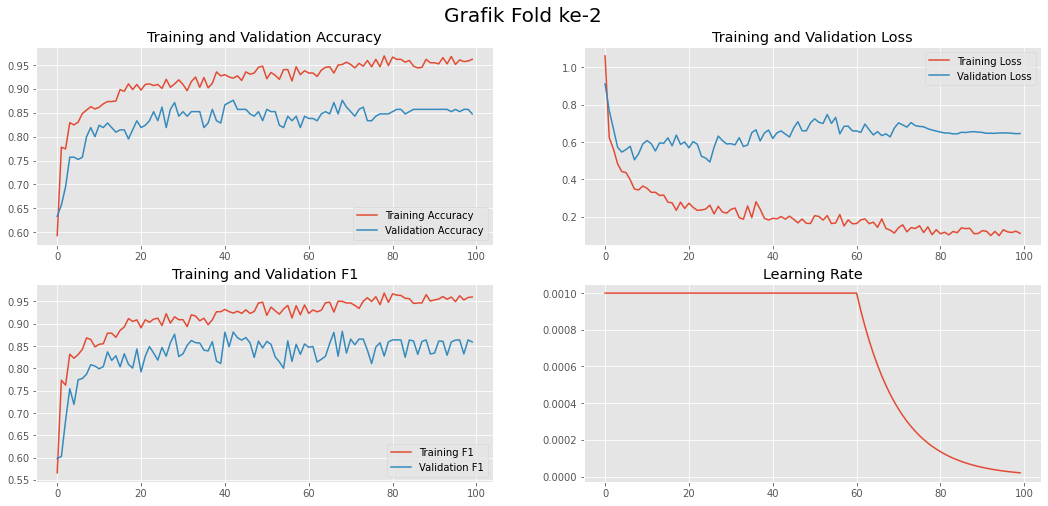


Fold 3/5

Found 838 validated image filenames belonging to 5 classes.
Found 210 validated image filenames belonging to 5 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
27/27 [==============================] - 12s 341ms/step - loss: 1.0760 - accuracy: 0.6193 - f1: 0.5952 - val_loss: 1.0478 - val_accuracy: 0.6238 - val_f1: 0.6082 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
27/27 [==============================] - 9s 317ms/step - loss: 0.6703 - accuracy: 0.7363 - f1: 0.7232 - val_loss: 0.6312 - val_accuracy: 0.7571 - val_f1: 0.7738 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
27/27 [==============================] - 9s 327ms/step - loss: 0.5560 - accuracy: 0.7816 - f1: 0.7788 - val_loss: 0.6502 - val_accuracy: 0.7714 - val_f1: 0.7532 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.00100000004

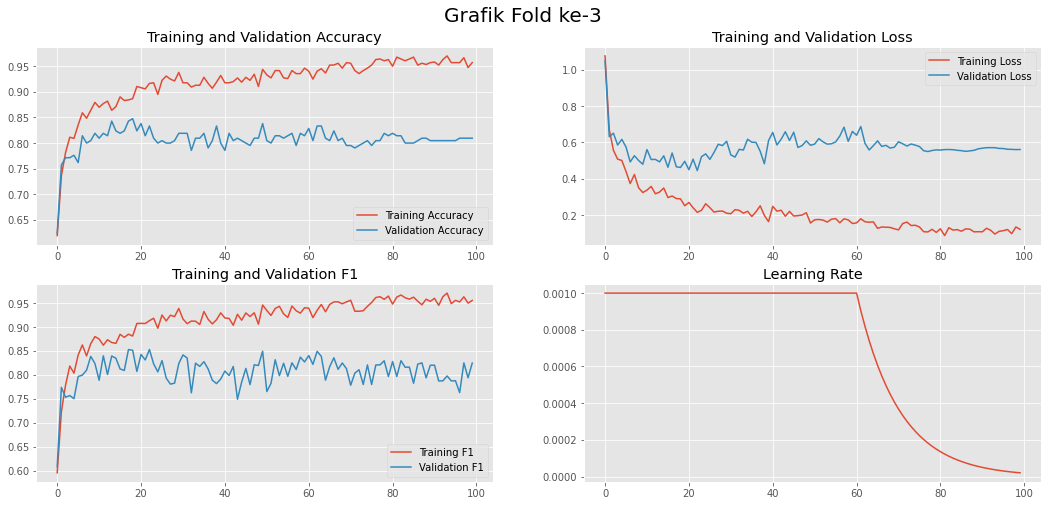


Fold 4/5

Found 839 validated image filenames belonging to 5 classes.
Found 209 validated image filenames belonging to 5 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
27/27 [==============================] - 14s 372ms/step - loss: 1.1128 - accuracy: 0.5638 - f1: 0.5385 - val_loss: 0.7380 - val_accuracy: 0.7081 - val_f1: 0.7346 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
27/27 [==============================] - 10s 362ms/step - loss: 0.6550 - accuracy: 0.7259 - f1: 0.7350 - val_loss: 0.5791 - val_accuracy: 0.7656 - val_f1: 0.7112 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
27/27 [==============================] - 9s 330ms/step - loss: 0.5570 - accuracy: 0.7831 - f1: 0.7758 - val_loss: 0.5388 - val_accuracy: 0.8038 - val_f1: 0.8153 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000

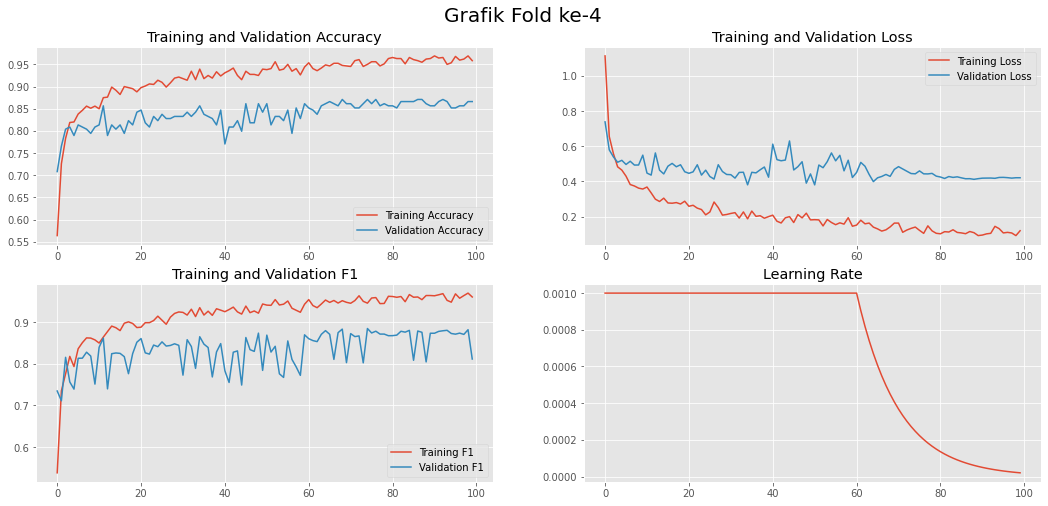


Fold 5/5

Found 839 validated image filenames belonging to 5 classes.
Found 209 validated image filenames belonging to 5 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
27/27 [==============================] - 12s 352ms/step - loss: 1.1367 - accuracy: 0.5948 - f1: 0.6057 - val_loss: 0.7114 - val_accuracy: 0.7129 - val_f1: 0.6643 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
27/27 [==============================] - 9s 322ms/step - loss: 0.6654 - accuracy: 0.7592 - f1: 0.7592 - val_loss: 0.6211 - val_accuracy: 0.7560 - val_f1: 0.7378 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
27/27 [==============================] - 9s 324ms/step - loss: 0.5481 - accuracy: 0.7914 - f1: 0.7811 - val_loss: 0.5555 - val_accuracy: 0.7943 - val_f1: 0.7939 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.00100000004

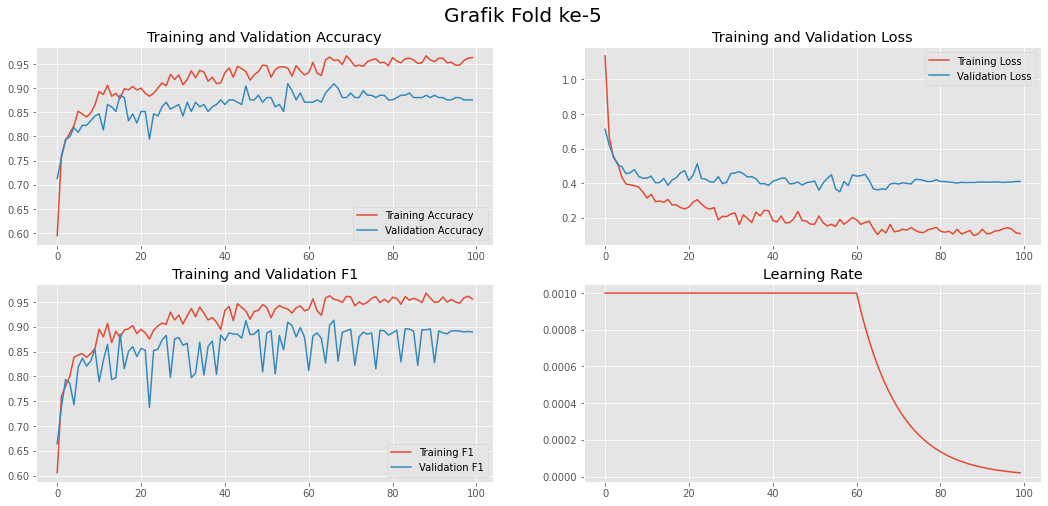

In [39]:
img_size = 180
fold_var = 0
epochs=100
for train_index, val_index in skf.split(X_train, y_train) :
    training_data = X_train.iloc[train_index]
    validation_data = X_train.iloc[val_index]
    
    fold_var += 1
    print("Fold ", fold_var, "/", num_fold, sep='')
    print()
    
    train_generator = train_datagen.flow_from_dataframe(dataframe=training_data,
                                                          x_col="Image path",  
                                                          y_col="Class",  
                                                          target_size=(img_size, img_size),
                                                          batch_size= 32,
                                                          seed = 2022)

    validation_generator = validation_datagen.flow_from_dataframe(dataframe=validation_data,
                                                                    x_col="Image path",
                                                                    y_col="Class",
                                                                    target_size=(img_size, img_size),
                                                                    batch_size=16,
                                                                    seed = 2022)
    
    tf.keras.backend.clear_session()
    model = getModel()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', f1])
    
#    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#                      filepath='weights-improvement-fold ke%d-{epoch:04d}-{val_f1:.5f}.hdf5'%fold_var,
#                      monitor='val_f1',
#                      mode='max',
#                      save_best_only=True,
#                      verbose=1)

    callbacks = [keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]
    
    history = model.fit(train_generator,
                        epochs=epochs,
                        validation_data=validation_generator,
                        callbacks = callbacks)
    
    accuracy += [history.history['accuracy']]
    val_accuracy += [history.history['val_accuracy']]

    loss += [history.history['loss']]
    val_loss += [history.history['val_loss']]

    f_1 += [history.history['f1']]
    val_f1 += [history.history['val_f1']]
    
    plot_result(history, 
                epochs, 
                "Grafik Fold ke-{}".format(str(fold_var)))
    
#    tf.saved_model.save(model, 
#                        export_dir = 'D:/Latihan/Model save')
    print()

In [40]:
# Provide average scores
mean_loss = []
mean_accuracy = []
mean_val_loss = []
mean_val_accuracy = []
mean_f1 = []
mean_val_f1 = []
print('------------------------------------------------------------------------')
print('Score per Fold')
for i in range(0, fold_var):
    print('----------------------------------------------------------------------------')
    print('> Fold {} - Loss: {} - Accuracy: {}'.format(i+1,np.min(loss[i]), np.max(accuracy[i])))
    print('> Fold {} - Val Loss: {} - Val Accuracy: {}'.format(i+1, np.min(val_loss[i]), np.max(val_accuracy[i])))
    print('> Fold {} - F1: {} - Val F1: {}'.format(i+1, np.max(f_1[i]), np.max(val_f1[i])))
    
    mean_loss.append(np.min(loss[i]))
    mean_accuracy.append(np.max(accuracy[i]))
    mean_val_loss.append(np.min(val_loss[i]))
    mean_val_accuracy.append(np.max(val_accuracy[i]))
    mean_f1.append(np.max(f_1[i]))
    mean_val_f1.append(np.max(val_f1[i]))
    
print('------------------------------------------------------------------------------')
print('Average scores for all folds:')
print('> Loss: {} - Accuracy: {} (+- {})'.format(np.mean(mean_loss), np.mean(mean_accuracy), np.std(mean_accuracy)))
print('> Val Loss: {} - Val Accuracy: {} (+- {})'.format(np.mean(mean_val_loss), np.mean(mean_val_accuracy), np.std(mean_val_accuracy)))
print('> F1: {} - Val F1: {}'.format(np.mean(mean_f1), np.mean(mean_val_f1)))
print('------------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per Fold
----------------------------------------------------------------------------
> Fold 1 - Loss: 0.1107206866145134 - Accuracy: 0.9677804112434387
> Fold 1 - Val Loss: 0.3466557562351227 - Val Accuracy: 0.8904761672019958
> Fold 1 - F1: 0.9696502685546875 - Val F1: 0.9007776379585266
----------------------------------------------------------------------------
> Fold 2 - Loss: 0.09781920909881592 - Accuracy: 0.9689737558364868
> Fold 2 - Val Loss: 0.4923945963382721 - Val Accuracy: 0.8761904835700989
> Fold 2 - F1: 0.968511164188385 - Val F1: 0.8829204440116882
----------------------------------------------------------------------------
> Fold 3 - Loss: 0.08616019040346146 - Accuracy: 0.9701670408248901
> Fold 3 - Val Loss: 0.44418662786483765 - Val Accuracy: 0.8476190567016602
> Fold 3 - F1: 0.9707691073417664 - Val F1: 0.8529473543167114
----------------------------------------------------------------

## Last part from SKFold

In [33]:
train_generator = train_datagen.flow_from_dataframe(dataframe=X_train,
                                                          x_col="Image path",  
                                                          y_col="Class",  
                                                          target_size=(img_size, img_size),
                                                          batch_size= 32,
                                                          seed = 2022)

test_generator = test_datagen.flow_from_dataframe(dataframe=X_test,
                                                  x_col="Image path",
                                                  y_col="Class",
                                                  target_size=(img_size, img_size),
                                                  batch_size=1,
                                                  seed = 2022,
                                                  shuffle = False)

last = getModel()
last.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

callbacks = [keras.callbacks.LearningRateScheduler(scheduler, verbose=1)]
    
history_last = last.fit(train_generator,
                         epochs=100,
                         callbacks = callbacks,
                         validation_data = test_generator)

Found 1048 validated image filenames belonging to 5 classes.
Found 117 validated image filenames belonging to 5 classes.

Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
33/33 [==============================] - 44s 810ms/step - loss: 1.8122 - accuracy: 0.3607 - val_loss: 2.0568 - val_accuracy: 0.2906 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
33/33 [==============================] - 21s 636ms/step - loss: 1.3167 - accuracy: 0.4781 - val_loss: 1.5959 - val_accuracy: 0.4359 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
33/33 [==============================] - 23s 682ms/step - loss: 1.2787 - accuracy: 0.4781 - val_loss: 1.7542 - val_accuracy: 0.2821 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/100
33/33 [==============================] - 24s 730ms/step - loss: 1.2397 - acc

In [34]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
predictions = last.predict(test_generator)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes,
print()
k = PrettyTable(['Accuracy Predictions', 'Accuracy Precison', 'Accuracy f1'])  
k.add_row([accuracy_score(true_classes, yPredictions), 
            precision_score(true_classes, yPredictions, average='weighted'), 
            f1_score(true_classes, yPredictions, average='weighted')])
print(k)

ValueError: Found input variables with inconsistent numbers of samples: [1, 117]

In [35]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes, yPredictions))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        25
           1       0.71      0.96      0.81        25
           2       0.68      0.52      0.59        25
           3       0.84      0.94      0.89        17
           4       0.71      0.48      0.57        25

    accuracy                           0.70       117
   macro avg       0.71      0.72      0.70       117
weighted avg       0.70      0.70      0.69       117



In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Bangkit')

In [ ]:
import cf_matrix
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(np.array(true_classes, dtype='int64'), np.array(yPredictions))
categories = ['Acne', 'Cancer', 'Eksim', 'Normal', 'Rosacea']
cf_matrix.make_confusion_matrix(confusion_matrix, 
                                categories=categories, 
                                cmap='binary')

NameError: ignored

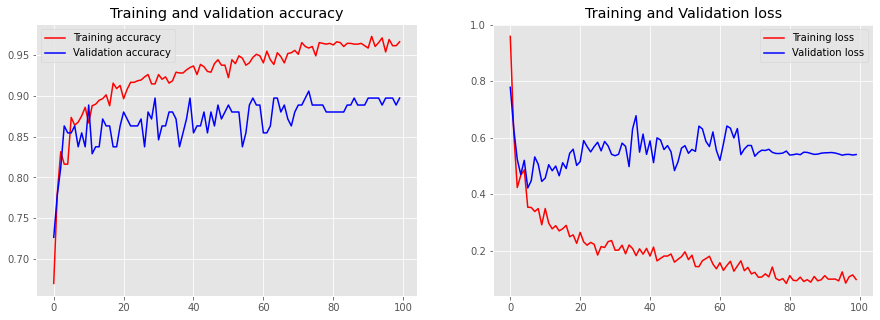

In [ ]:
acc = history_last.history['accuracy']
val_acc = history_last.history['val_accuracy']
loss = history_last.history['loss']
val_loss = history_last.history['val_loss']

epochs = range(len(acc))

fig = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)

plt.show()